In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [3]:
data = pd.read_csv('Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
real_X = data.iloc[:,2:4].values
real_Y = data.iloc[:,4].values

In [11]:
train_X,test_X,train_Y,test_Y = train_test_split(real_X,real_Y,test_size=0.25,random_state=0)

In [13]:
#Since the difference between age and salary is very big we need to apply feature scaling data between -2 and +2
scaler = StandardScaler()

In [16]:
train_X = scaler.fit_transform(train_X)
test_X = scaler.fit_transform(test_X)

In [17]:
train_X

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [19]:
lr = LogisticRegression(random_state=0)

In [20]:
lr.fit(train_X,train_Y)

C:\Users\Darsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
pred_Y = lr.predict(test_X)

In [22]:
pred_Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [23]:
test_Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [25]:
confMatrix = confusion_matrix(y_true=test_Y,y_pred=pred_Y)

In [26]:
confMatrix

array([[63,  5],
       [ 7, 25]], dtype=int64)

C:\Users\Darsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'aplha'
  """
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


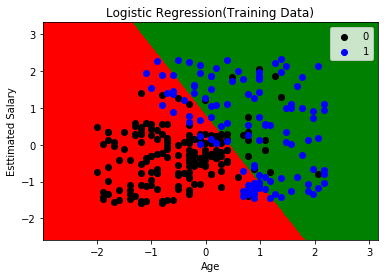

In [32]:
set_X,set_Y = train_X,train_Y
X1,X2 = np.meshgrid(np.arange(start = set_X[:,0].min()-1, stop = set_X[:,0].max()+1,step=0.01),
                    np.arange(start = set_X[:,1].min()-1, stop = set_X[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,lr.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             aplha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(set_Y)):
    plt.scatter(set_X[set_Y == j ,0],set_X[set_Y == j ,1],
               c=ListedColormap(('black','blue'))(i),label=j)
plt.title('Logistic Regression(Training Data)')
plt.xlabel('Age')
plt.ylabel('Esttimated Salary')
plt.legend()
plt.show()

In [36]:
X1,X2 = np.meshgrid(np.arange(start = set_X[:,0].min()-1, stop = set_X[:,0].max()+1,step=0.01),
                    np.arange(start = set_X[:,1].min()-1, stop = set_X[:,1].max()+1,step=0.01))
X1.ravel()

array([-2.99318916, -2.98318916, -2.97318916, ...,  3.13681084,
        3.14681084,  3.15681084])

C:\Users\Darsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'aplha'
  """
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


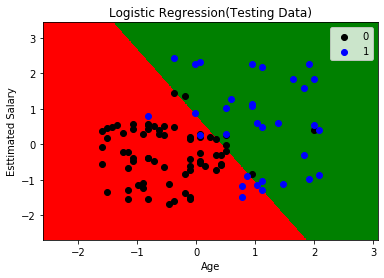

In [37]:
set_X,set_Y = test_X,test_Y
X1,X2 = np.meshgrid(np.arange(start = set_X[:,0].min()-1, stop = set_X[:,0].max()+1,step=0.01),
                    np.arange(start = set_X[:,1].min()-1, stop = set_X[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,lr.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             aplha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(set_Y)):
    plt.scatter(set_X[set_Y == j ,0],set_X[set_Y == j ,1],
               c=ListedColormap(('black','blue'))(i),label=j)
plt.title('Logistic Regression(Testing Data)')
plt.xlabel('Age')
plt.ylabel('Esttimated Salary')
plt.legend()
plt.show()